# XGBoost

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!which python3

/Users/emredagli/miniconda3/envs/3.9-real-estate-appraisal-ml-estimator/bin/python3


In [3]:
df = pd.read_csv("../../data/02_model/kc_house_data_cleaned_01.csv");

In [4]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,renovated,age_renovated,has_basement
0,12.309987,3,1.00,7.074117,8.639588,1.0,0,3,7,98178,47.5112,-122.257,0,60,0
1,13.195616,3,2.25,7.852050,8.887791,2.0,0,3,7,98125,47.7210,-122.319,1,24,1


In [5]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [6]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

XGBoost's hyperparameters
Tthe most common parameters are:

* learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
* max_depth: determines how deeply each tree is allowed to grow during any boosting round.
* subsample: percentage of samples used per tree. Low value can lead to underfitting.
* colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
* n_estimators: number of trees you want to build.
* objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision,
* binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

* gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
* alpha: L1 regularization on leaf weights. A large value leads to more regularization.
* lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
X_train.shape, X_test.shape

((17264, 14), (4316, 14))

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [10]:
xg_reg.fit(X_train,y_train)

[22:38:52] WARNING: /private/var/folders/85/03dq5z2s1xd6j_lk_dqvctbh0000gn/T/pip-install-7ifaklwu/xgboost_9ea404f742564ddf87a166d4870134ac/build/temp.macosx-11.1-arm64-3.9/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=10, n_jobs=10,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [11]:
preds = xg_reg.predict(X_test)

In [18]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

4.388657314304259


### k-fold Cross Validation using XGBoost

In [13]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[22:38:52] WARNING: /private/var/folders/85/03dq5z2s1xd6j_lk_dqvctbh0000gn/T/pip-install-7ifaklwu/xgboost_9ea404f742564ddf87a166d4870134ac/build/temp.macosx-11.1-arm64-3.9/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:52] WARNING: /private/var/folders/85/03dq5z2s1xd6j_lk_dqvctbh0000gn/T/pip-install-7ifaklwu/xgboost_9ea404f742564ddf87a166d4870134ac/build/temp.macosx-11.1-arm64-3.9/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:38:52] WARNING: /private/var/folders/85/03dq5z2s1xd6j_lk_dqvctbh0000gn/T/pip-install-7ifaklwu/xgboost_9ea404f742564ddf87a166d4870134ac/build/temp.macosx-11.1-arm64-3.9/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.305321,0.000772,11.305328,0.001913
1,10.176700,0.000845,10.176607,0.002065
2,9.161166,0.001104,9.161188,0.001923
3,8.246947,0.000960,8.246952,0.002306
4,7.424666,0.000695,7.424567,0.002645


In [15]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.238071
Name: test-rmse-mean, dtype: float64


In [16]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[22:38:53] WARNING: /private/var/folders/85/03dq5z2s1xd6j_lk_dqvctbh0000gn/T/pip-install-7ifaklwu/xgboost_9ea404f742564ddf87a166d4870134ac/build/temp.macosx-11.1-arm64-3.9/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


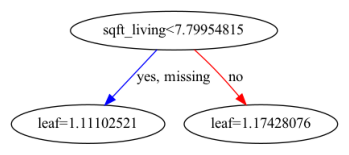

In [17]:
xgb.plot_tree(xg_reg,num_trees=1)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()